#### (과제 1) Fashion MNIST dataset
- AutoEncoder architecture를 다음과 같이 수정하여 test dataset의 처음 10개 data에 대해 AutoEncoding한 결과를 출력하시오<br>
(1) Dataset: Fashion MNIST<br>
(2) Encoder: 784 $\rightarrow$ 500 $\rightarrow$ 300  $\rightarrow$ 200  $\rightarrow$  100  $\rightarrow$  50  $\rightarrow$  30<br>
(3) Decoder: 30  $\rightarrow$  50  $\rightarrow$  100  $\rightarrow$  200  $\rightarrow$  300  $\rightarrow$  500  $\rightarrow$  784<br>
(4) Activation function: SELU

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Layer, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [12]:
import keras
from keras import layers

from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [4]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [6]:
tf.random.set_seed(42)
np.random.seed(42)
#인코더
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), #input 28x28 벡터로 
    keras.layers.Dense(784, activation="selu"),# selu acriv, 100개 노드
    keras.layers.Dense(500, activation="selu"),
    keras.layers.Dense(300, activation="selu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
#디코더네트워크
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", input_shape=[30]),
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(300, activation="selu"),
    keras.layers.Dense(500, activation="selu"),
    keras.layers.Dense(784, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

In [7]:
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 18s 10ms/step - loss: 5.5549 - rounded_accuracy: 0.6273 - val_loss: 5.7512 - val_rounded_accuracy: 0.6241
Epoch 2/20
1719/1719 [==============================] - 19s 11ms/step - loss: 5.7425 - rounded_accuracy: 0.6248 - val_loss: 5.7512 - val_rounded_accuracy: 0.6241
Epoch 3/20
1719/1719 [==============================] - 20s 12ms/step - loss: 5.7425 - rounded_accuracy: 0.6248 - val_loss: 5.7512 - val_rounded_accuracy: 0.6241
Epoch 4/20
1719/1719 [==============================] - 20s 12ms/step - loss: 5.7425 - rounded_accuracy: 0.6248 - val_loss: 5.7512 - val_rounded_accuracy: 0.6241
Epoch 5/20
1719/1719 [==============================] - 20s 12ms/step - loss: 5.7426 - rounded_accuracy: 0.6248 - val_loss: 5.7512 - val_rounded_accuracy: 0.6241
Epoch 6/20
1719/1719 [==============================] - 21s 12ms/step - loss: 5.7425 - rounded_accuracy: 0.6248 - val_loss: 5.7512 - val_rounded_accuracy: 0.6241
Epoch 7/20
1719/1719 [======

In [8]:
def show_reconstructions(model, images=X_valid, n_images=10):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

In [9]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

1/1 [==============================] - 0s 18ms/step


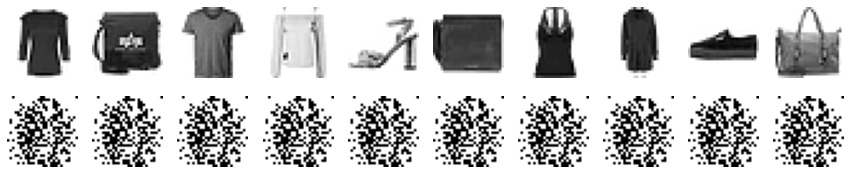

In [14]:
show_reconstructions(stacked_ae)
# save_fig("reconstruction_plot")

#### (과제 2)  MNIST dataset
- AutoEncoder architecture를 다음과 같이 수정하여 test dataset의 처음 10개 data에 대해 AutoEncoding한 결과를 출력하시오<br>
(1) Dataset: MNIST<br>
(2) Encoder: 784 $\rightarrow$ 500 $\rightarrow$  100  $\rightarrow$  50  $\rightarrow$  30<br>
(3) Decoder: 30  $\rightarrow$  50  $\rightarrow$  100  $\rightarrow$  500  $\rightarrow$  784<br>
(4) Activation function: SELU

In [15]:
import tensorflow
import keras
keras.__version__

from keras import models
from keras import layers

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [17]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [18]:
tf.random.set_seed(42)
np.random.seed(42)
#인코더
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), #input 28x28 벡터로 
    keras.layers.Dense(784, activation="selu"),# selu acriv, 100개 노드
    keras.layers.Dense(500, activation="selu"),
    keras.layers.Dense(300, activation="selu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
#디코더네트워크
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", input_shape=[30]),
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(300, activation="selu"),
    keras.layers.Dense(500, activation="selu"),
    keras.layers.Dense(784, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

In [19]:
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.1604 - rounded_accuracy: 0.9311 - val_loss: 0.1248 - val_rounded_accuracy: 0.9522
Epoch 2/20
1719/1719 [==============================] - 19s 11ms/step - loss: 1.3566 - rounded_accuracy: 0.8930 - val_loss: 2.3910 - val_rounded_accuracy: 0.8435
Epoch 3/20
1719/1719 [==============================] - 19s 11ms/step - loss: 2.3955 - rounded_accuracy: 0.8431 - val_loss: 2.3910 - val_rounded_accuracy: 0.8435
Epoch 4/20
1719/1719 [==============================] - 20s 11ms/step - loss: 2.3955 - rounded_accuracy: 0.8431 - val_loss: 2.3910 - val_rounded_accuracy: 0.8435
Epoch 5/20
1719/1719 [==============================] - 21s 12ms/step - loss: 2.3955 - rounded_accuracy: 0.8431 - val_loss: 2.3910 - val_rounded_accuracy: 0.8435
Epoch 6/20
1719/1719 [==============================] - 21s 12ms/step - loss: 2.3955 - rounded_accuracy: 0.8431 - val_loss: 2.3910 - val_rounded_accuracy: 0.8435
Epoch 7/20
1719/1719 [======

In [20]:
def show_reconstructions(model, images=X_valid, n_images=10):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

In [21]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

1/1 [==============================] - 0s 141ms/step


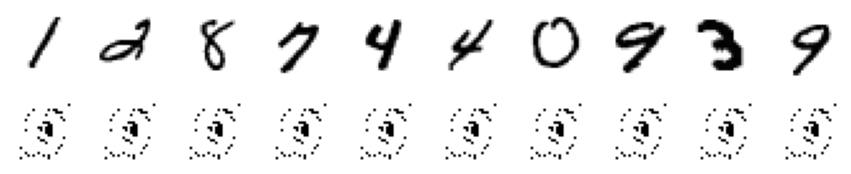

In [22]:
show_reconstructions(stacked_ae)
# save_fig("reconstruction_plot")